* grouplens MovieLens 2018 100k data: https://grouplens.org/datasets/movielens/latest/
* feature engineered genres by performing one hot encoding
* utilized random forest to confirm that this model would be a poor predictor when compared to recommender models

In [2]:
# import dependencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import movies
df = pd.read_csv("../data/ml-100k/2018100k.csv")
df.head()

,Unnamed: 0,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,5,1,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,7,1,4.5,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,15,1,2.5,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,17,1,4.5,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# set rating to what we are trying to predict
target = df["rating"].astype(int)

In [5]:
# removing ratings to create our x values
data = df
data.drop(["rating"],axis=1, inplace=True)
data.drop(["Unnamed: 0"],axis=1, inplace=True)

In [6]:
# data = data
feature_names = data.columns
data.head()

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
rf = RandomForestClassifier(n_estimators=100)

In [9]:
rf = rf.fit(X_train, y_train)

In [10]:
rf.score(X_test, y_test)

0.34285374271093655

In [11]:
importances = rf.feature_importances_
importances

array([6.26711102e-01, 2.81393596e-01, 9.70306777e-05, 7.87526511e-03,
       7.55170505e-03, 3.20576729e-03, 3.86905262e-03, 5.77650645e-03,
       5.75949848e-03, 1.12994896e-03, 5.92252098e-03, 6.75036485e-03,
       1.10470641e-03, 4.10710837e-03, 2.52245792e-03, 3.06076903e-03,
       4.75931424e-03, 7.29538757e-03, 7.53432017e-03, 7.74941744e-03,
       3.29167703e-03, 2.53248394e-03])

In [12]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6267111015374812, 'userId'),
 (0.28139359587437657, 'movieId'),
 (0.00787526510574528, 'Action'),
 (0.007749417437962417, 'Thriller'),
 (0.007551705047195401, 'Adventure'),
 (0.007534320174206419, 'Sci-Fi'),
 (0.007295387572595545, 'Romance'),
 (0.006750364851239944, 'Fantasy'),
 (0.005922520977851724, 'Drama'),
 (0.005776506454791015, 'Comedy'),
 (0.005759498479153123, 'Crime'),
 (0.00475931424286584, 'Mystery'),
 (0.004107108365120518, 'Horror'),
 (0.0038690526174938373, 'Children'),
 (0.0032916770342492907, 'War'),
 (0.003205767286243294, 'Animation'),
 (0.0030607690264752513, 'Musical'),
 (0.0025324839448660325, 'Western'),
 (0.0025224579226562236, 'IMAX'),
 (0.0011299489568289494, 'Documentary'),
 (0.0011047064129416611, 'Film-Noir'),
 (9.703067766026342e-05, '(no genres listed)')]

In [13]:
sns.set(rc={'figure.figsize':(6,10)})

No handles with labels found to put in legend.


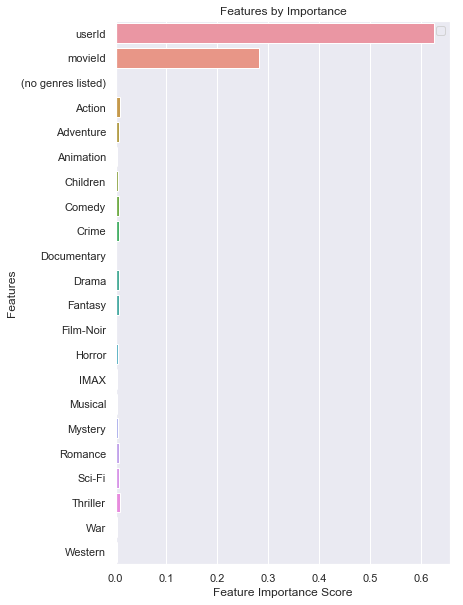

In [14]:
sns.barplot(x=importances, y=feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Features by Importance")
plt.legend()
plt.savefig("../images/RF2018OHE.png")
plt.show()

In [15]:
predicted_y = rf.predict(X_test)

In [16]:
actual_y = y_test.to_numpy()

In [17]:
mean_squared_error(actual_y, predicted_y)


1.6977270022610973